<h1 align=center><font size = 6>Where to start an Indian Restaurant in Silicon Valley, California.</font><h1>

<h2>Introduction</h2>

As every computer engineers dream land **Silicon Valley**, let's explore where to start an Indian restaurant by analyzing Indian population and Indian restaurants in the dream land. It is a region in the southern part of the San Francisco Bay Area in Northern California that serves as a global center for high technology, innovation, venture capital, and social media. Major Silicon Valley cities are multi-cultural includes San Jose, Sunnyvale, Santa Clara, Mountain View, Palo Alto and Cupertino. There are 4 million people in Silicon Valley out of which around 6% people are Immigrants from India.

As we can see from the above, there are around 2,40,000 people are Indians. They are scattered all over the major cities in Silicon Valley. As they are living far away from their native there is a high chance for them to miss their authentic native food. So, they always look for the same in their locality. When we think of it by investor, they expect to prefer a place where the Indians are more and Indian restaurants is less. 

When we consider all these problems, we can create a map and information chart where the Indian restaurants is less with respective to Indian population and each restaurant is clustered according to its type. We are going to analyze and report the best locality where one can start an Indian restaurant.

<h2>Table of Contents</h2>

1. Restaurant data preparation
2. Population data preparation
3. Analyzing and Merging - Restaurant and Population data
4. Exploring and Clustering the Indian restaurants in Silicon Valley

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [241]:
import pandas as pd
import numpy as np
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from sklearn import preprocessing

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Imported Successfully')

Solving environment: done

# All requested packages already installed.

Imported Successfully


In [242]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [243]:
from bs4 import BeautifulSoup

In [244]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


<h2>1. Restaurant data preparation</h2>

We are going to use the **geopy** library to get the latitude and longitude values of Silicon Valley.

In [245]:
address = 'Silicon Valley'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Silicon Valley are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Silicon Valley are 37.4429964, -122.1545229.


We are framing the URL to retrieve Indian restaurants in Silicon Valley using **Foursquare API**. Dataset which we retrieved will be in JSON format and then we have to convert the same in to pandas Dataframe

In [246]:
CLIENT_ID = ''
CLIENT_SECRET = ''
VERSION = '20180604'
LIMIT = 500

url = 'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d10f941735&client_id={}&client_secret={}&ll={},{}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, LIMIT)

results = requests.get(url).json()

restaurants = results['response']['venues']
df_restaurants = json_normalize(restaurants)
df_restaurants.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.crossStreet,location.postalCode,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood,venuePage.id
0,5e4df93bac54950008557335,Ettan,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1590932692,False,518 Bryant Street,37.445351,-122.161423,"[{'label': 'display', 'lat': 37.44535122264185...",663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5d43ac64da59890008a83c6b,Curry Pizza House - Palo Alto,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1590932692,False,320 University Ave,37.446183,-122.161262,"[{'label': 'display', 'lat': 37.446183, 'lng':...",693,...,Bryant St,94301,1285810,https://www.grubhub.com/restaurant/curry-pizza...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
2,5bd4d3e68afbe0002d879721,Kasa Indian Eatery,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1590932692,False,2086 Broadway St,37.486640,-122.227670,"[{'label': 'display', 'lat': 37.48664, 'lng': ...",8085,...,Jefferson,94063,967625,https://www.grubhub.com/restaurant/kasa-indian...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
3,57314090498e77a6f30bc379,Naan & Curry,"[{'id': '54135bf5e4b08f3d2429dfdd', 'name': 'N...",v-1590932692,False,NaN,37.321388,-121.971973,"[{'label': 'display', 'lat': 37.32138809722174...",21071,...,NaN,NaN,332609,https://www.grubhub.com/restaurant/naan--curry...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN
4,5eb8d907e6959a0008e83033,Puranpoli,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1590932692,False,3074b Scott Blvd,37.376860,-121.961360,"[{'label': 'display', 'lat': 37.37686, 'lng': ...",18598,...,NaN,95054,2040530,https://www.grubhub.com/restaurant/puranpoli-3...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN


The retrieved dataset has many fields, we are goinf to filter the above dataframe based on our requirements using the below function

In [247]:
filtered_columns = ['name', 'categories'] + [col for col in df_restaurants.columns if col.startswith('location.')] + ['id']
df_restaurants_filtered = df_restaurants.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

df_restaurants_filtered['categories'] = df_restaurants_filtered.apply(get_category_type, axis=1)

df_restaurants_filtered.columns = [column.split('.')[-1] for column in df_restaurants_filtered.columns]

The Indian restaurants are filtered from the master dataset as below

In [248]:
df_restaurants_filtered = df_restaurants_filtered[['name','categories','city','lat','lng']]
df_restaurants_filtered = df_restaurants_filtered.rename(columns={'city':'cities'})

df_indian_restaurants = df_restaurants_filtered[df_restaurants_filtered.categories.str.contains('Indian')]
df_indian_restaurants = df_indian_restaurants.reset_index(drop=True)
df_indian_restaurants.head()

,name,categories,cities,lat,lng
0,Ettan,Indian Restaurant,Palo Alto,37.445351,-122.161423
1,Kasa Indian Eatery,Indian Restaurant,Redwood City,37.486640,-122.227670
2,Naan & Curry,North Indian Restaurant,San Jose,37.321388,-121.971973
3,Puranpoli,Indian Restaurant,Santa Clara,37.376860,-121.961360
4,Dosa Hut,Indian Restaurant,Fremont,37.544289,-121.975863


Let's visualize the Indian restaurants in Map

In [249]:
map_sv = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, label in zip(df_indian_restaurants['lat'], df_indian_restaurants['lng'],df_indian_restaurants['name'] + ' - ' + df_indian_restaurants['categories']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sv)  
    
map_sv

We are going to filter the above dataset with the following cities **San Jose, Sunnyvale, Santa Clara, Mountain View, Palo Alto, Cupertino**. Hereafter through out the process will work on these selected cities only.

In [250]:
df_restaurant_city = pd.DataFrame(df_indian_restaurants.groupby('cities')['cities'].count())
df_restaurant_city = df_restaurant_city.rename(columns={'cities':'count'})

sv_cities = ['San Jose','Sunnyvale','Santa Clara','Mountain View','Palo Alto','Cupertino']
df_restaurant_city = df_restaurant_city.loc[sv_cities]

We are going to count how many number of restaurants are there in respective cities

In [251]:
df_restaurant_city = df_restaurant_city.sort_values('count', ascending=False)
df_restaurant_city = df_restaurant_city.reset_index()
df_restaurant_city

,cities,count
0,Sunnyvale,10
1,San Jose,6
2,Santa Clara,5
3,Mountain View,2
4,Palo Alto,2
5,Cupertino,1


Let's create a bar chart to explore the above dataset

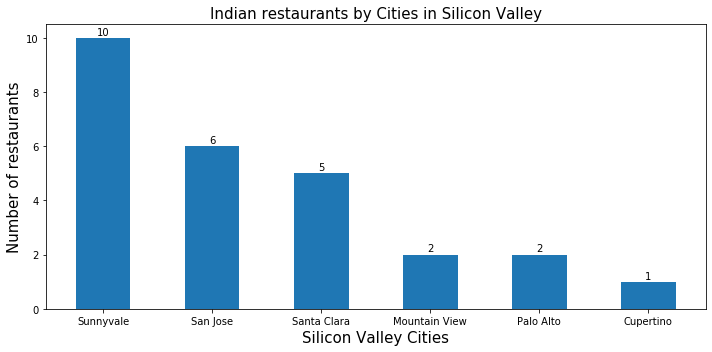

In [252]:
X = df_restaurant_city['cities']
Y = df_restaurant_city['count']

fig, ax = plt.subplots(figsize=(10, 5))
rects = ax.bar(X, Y, label=None, width=0.5)

ax.set_xlabel('Silicon Valley Cities',fontsize=15)
ax.set_ylabel('Number of restaurants',fontsize=15)
ax.set_title('Indian restaurants by Cities in Silicon Valley',fontsize=15)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)
fig.tight_layout()
plt.show()

<h2>2. Population data preparation</h2>

By scraping the following page, http://zipatlas.com/us/ca/city-comparison/percentage-indian-population.htm, we will get a table data which has the information of indian population in california. Next, we have to transform the data into a pandas dataframe 

In [253]:
url_population='http://zipatlas.com/us/ca/city-comparison/percentage-indian-population.htm'
response = requests.get(url_population)

soup = BeautifulSoup(response.text,'html.parser')

california_population_table = soup.find('table', attrs={'rules':'all','frame':'box'})

lst = pd.read_html(str(california_population_table))

df_california_population = pd.DataFrame(lst[0])
new_header = df_california_population.iloc[0]
df_california_population = df_california_population[1:]
df_california_population.columns = new_header

df_california_population.head()

,#,Location (# Zip Codes),City Report,Population,% Indians (Asian),National Rank
1,1.,"Mount Hamilton, California (1)",NaN,35,11.42 %,#12
2,2.,"Livingston, California (1)",NaN,12666,10.31 %,#16
3,3.,"Fremont, California (4)","% Indians (Asian) in Fremont, CA",203417,10.15 %,#17
4,4.,"Yuba City, California (2)","% Indians (Asian) in Yuba City, CA",62741,10.08 %,#19
5,5.,"Sunnyvale, California (3)","% Indians (Asian) in Sunnyvale, CA",131018,10.07 %,#20


Filter the above data by removing unwanted column.

In [254]:
df_california_population = df_california_population[['Location (# Zip Codes)','Population','% Indians (Asian)']]

df_california_population.rename(columns={'Location (# Zip Codes)':'city','Population':'total_population','% Indians (Asian)':'indians_percentage'},inplace=True)

df_california_population[['cities','country']] = df_california_population['city'].str.split(',',expand=True)

df_california_population = df_california_population[['cities','total_population','indians_percentage']]
df_california_population.set_index('cities',inplace=True)

df_sv_population = df_california_population.loc[['San Jose','Sunnyvale','Santa Clara','Mountain View','Palo Alto','Cupertino']]

df_sv_population = df_sv_population.replace('\%','',regex=True).astype(float)

df_sv_population = df_sv_population.round()

df_sv_population['indians_population'] = (df_sv_population['total_population']*df_sv_population['indians_percentage'])/100

df_sv_population = df_sv_population.round()

df_sv_population = df_sv_population.reset_index()

df_sv_population.head()

,cities,total_population,indians_percentage,indians_population
0,San Jose,930193.0,3.0,27906.0
1,Sunnyvale,131018.0,10.0,13102.0
2,Santa Clara,102320.0,9.0,9209.0
3,Mountain View,73424.0,4.0,2937.0
4,Palo Alto,87857.0,2.0,1757.0


Let's visualize the above population data set in the bar chart

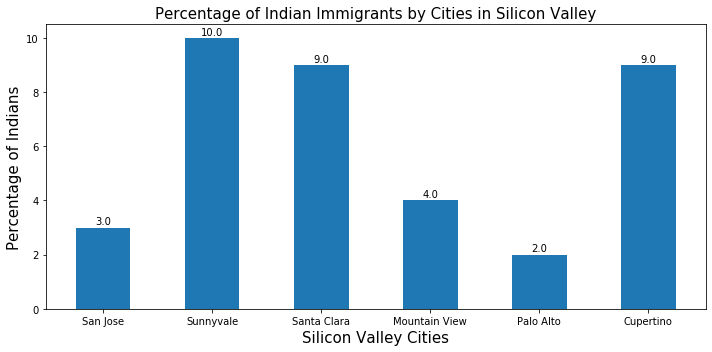

In [255]:
X = df_sv_population['cities']
Y = df_sv_population['indians_percentage']

fig, ax = plt.subplots(figsize=(10, 5))
rects = ax.bar(X, Y, label=None, width=0.5)

ax.set_xlabel('Silicon Valley Cities',fontsize=15)
ax.set_ylabel('Percentage of Indians',fontsize=15)
ax.set_title('Percentage of Indian Immigrants by Cities in Silicon Valley',fontsize=15)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)
fig.tight_layout()
plt.show()

<h2>3. Analyzing and Merging - Restaurant and Population data</h2>

We are going to merging both the datasets depends on their cities

In [256]:
df_sv_indians = df_sv_population[['cities','indians_population']]

df_sv = pd.merge(df_restaurant_city,df_sv_indians,on='cities')

df_sv.rename(columns={'count':'indian_restaurants'},inplace=True)

df_sv = df_sv.set_index('cities')

df_sv.index.name = None

df_sv

,indian_restaurants,indians_population
Sunnyvale,10,13102.0
San Jose,6,27906.0
Santa Clara,5,9209.0
Mountain View,2,2937.0
Palo Alto,2,1757.0
Cupertino,1,4897.0


Normalize the above dataset for comparing the ratio of restaurants with respect to the population

In [257]:
x = df_sv.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_sv_normalized = pd.DataFrame(x_scaled,columns=df_sv.columns,index = df_sv.index)

Let's visualize the ratio of resaturants with population

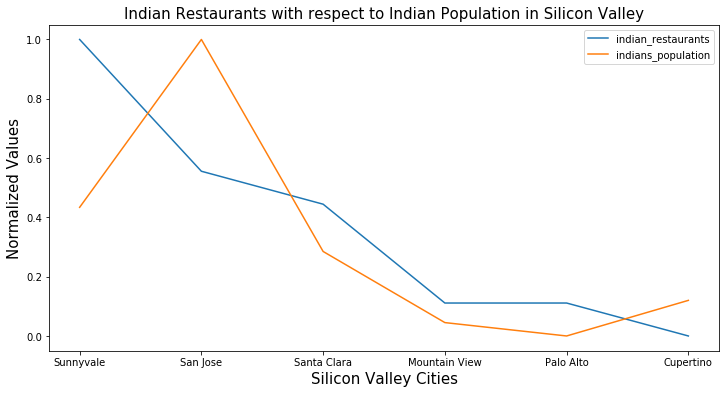

In [258]:
df_sv_normalized.plot(kind='line',figsize=(12,6))
plt.xlabel('Silicon Valley Cities',fontsize=15)
plt.ylabel('Normalized Values',fontsize=15)
plt.title('Indian Restaurants with respect to Indian Population in Silicon Valley',fontsize=15)
plt.show()

<h2>4. Exploring and Clustering the Indian restaurants in Silicon Valley</h2>

There is different type of Indian restaurants are there in the Silicon Valley. **K-Means** algorithm is one of the most common cluster method of unsupervised learning. We are going to use K-means algorithm to cluster the restaurant type in each city.

In [259]:
df_kmeans = df_indian_restaurants[['categories','cities']]
df_kmeans = df_kmeans.set_index('cities')
df_kmeans = df_kmeans.loc[sv_cities]
df_kmeans = df_kmeans.reset_index()

df_kmeans.head()

,cities,categories
0,San Jose,North Indian Restaurant
1,San Jose,Indian Restaurant
2,San Jose,Indian Restaurant
3,San Jose,Indian Restaurant
4,San Jose,Indian Restaurant


Let's see how many restaurants were returned for each city

In [260]:
df_kmeans.groupby('cities').count()

,categories
cities,
Cupertino,1
Mountain View,2
Palo Alto,2
San Jose,6
Santa Clara,5
Sunnyvale,10


In [261]:
print('There are {} uniques categories.'.format(len(df_kmeans['categories'].unique())))

There are 3 uniques categories.


Analyzing each neighborhood

By using one hot encoding, the categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [262]:
df_onehot = pd.get_dummies(df_kmeans[['categories']], prefix="", prefix_sep="")
df_onehot['cities'] = df_kmeans['cities'] 
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]
df_onehot.head()

,cities,Indian Restaurant,North Indian Restaurant,South Indian Restaurant
0,San Jose,0,1,0
1,San Jose,1,0,0
2,San Jose,1,0,0
3,San Jose,1,0,0
4,San Jose,1,0,0


Let's examine the new dataframe size

In [263]:
df_onehot.shape

(26, 4)

Let's group rows by cities and by taking the mean of the frequency of occurrence of each category

In [264]:
df_onehot_grouped = df_onehot.groupby('cities').mean().reset_index()
df_onehot_grouped

,cities,Indian Restaurant,North Indian Restaurant,South Indian Restaurant
0,Cupertino,1.000000,0.000000,0.0
1,Mountain View,1.000000,0.000000,0.0
2,Palo Alto,1.000000,0.000000,0.0
3,San Jose,0.833333,0.166667,0.0
4,Santa Clara,0.800000,0.000000,0.2
5,Sunnyvale,0.900000,0.000000,0.1


Let's see the new size

In [265]:
df_onehot_grouped.shape

(6, 4)

The below function is used to sort the venues in descending order

In [266]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

Let's create the new dataframe and display the 3 types of restaurants for each cities.

In [267]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

columns = ['cities']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant Type'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant Type'.format(ind+1))

cities_restaurants_type_sorted = pd.DataFrame(columns=columns)
cities_restaurants_type_sorted['cities'] = df_onehot_grouped['cities']

for ind in np.arange(df_onehot_grouped.shape[0]):
    cities_restaurants_type_sorted.iloc[ind, 1:] = return_most_common_venues(df_onehot_grouped.iloc[ind, :], num_top_venues)

In [268]:
cities_restaurants_type_sorted

,cities,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type
0,Cupertino,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
1,Mountain View,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
2,Palo Alto,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
3,San Jose,Indian Restaurant,North Indian Restaurant,South Indian Restaurant
4,Santa Clara,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
5,Sunnyvale,Indian Restaurant,South Indian Restaurant,North Indian Restaurant


Using k-means to cluster the cities into 3 clusters

In [269]:
kclusters = 3
df_onehot_grouped_clustering = df_onehot_grouped.drop('cities', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_onehot_grouped_clustering)
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 0, 0], dtype=int32)

We are going to create a new dataframe that includes the cluster as well as the 3 restaurant types for each cities

In [270]:
cities_restaurants_type_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
restaurants_merged = df_indian_restaurants
restaurants_merged = restaurants_merged.join(cities_restaurants_type_sorted.set_index('cities'), on='cities')

In [271]:
restaurants_merged = restaurants_merged.drop(['name','cities'],axis=1)
restaurants_merged = restaurants_merged.dropna()
restaurants_merged

,categories,lat,lng,Cluster Labels,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type
0,Indian Restaurant,37.445351,-122.161423,1.0,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
2,North Indian Restaurant,37.321388,-121.971973,2.0,Indian Restaurant,North Indian Restaurant,South Indian Restaurant
3,Indian Restaurant,37.376860,-121.961360,0.0,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
6,Indian Restaurant,37.319220,-122.033050,1.0,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
7,South Indian Restaurant,37.352790,-121.957810,0.0,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
8,Indian Restaurant,37.394322,-121.959752,0.0,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
12,Indian Restaurant,37.365801,-122.028654,0.0,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
13,Indian Restaurant,37.350743,-121.884273,2.0,Indian Restaurant,North Indian Restaurant,South Indian Restaurant
16,Indian Restaurant,37.366203,-122.013419,0.0,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
17,South Indian Restaurant,37.371130,-122.046882,0.0,Indian Restaurant,South Indian Restaurant,North Indian Restaurant


In [272]:
restaurants_merged['Cluster Labels'] = restaurants_merged['Cluster Labels'].astype(int)

Let's estimate the number of 1st Most Common Venue in each cluster

In [273]:
df_common = restaurants_merged[['Cluster Labels','1st Most Common Restaurant Type']]
df_common = df_common.groupby('Cluster Labels').count()

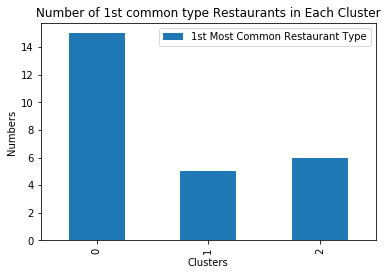

In [274]:
df_common.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Numbers')
plt.title('Number of 1st common type Restaurants in Each Cluster')
plt.show()

Let's visualize the resulting clusters

In [275]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(restaurants_merged['lat'], restaurants_merged['lng'], restaurants_merged['categories'], restaurants_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now, we can examine each cluster and determine the discriminating restaurant types that distinguish each cluster.

**Cluster 1**

In [276]:
restaurants_merged.loc[restaurants_merged['Cluster Labels'] == 0, restaurants_merged.columns[[0] + list(range(4, restaurants_merged.shape[1]))]]

,categories,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type
3,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
7,South Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
8,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
12,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
16,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
17,South Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
21,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
25,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
27,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
29,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant


**Cluster 2**

In [277]:
restaurants_merged.loc[restaurants_merged['Cluster Labels'] == 1, restaurants_merged.columns[[0] + list(range(4, restaurants_merged.shape[1]))]]

,categories,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type
0,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
6,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
19,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
20,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant
43,Indian Restaurant,Indian Restaurant,South Indian Restaurant,North Indian Restaurant


**Cluster 3**

In [278]:
restaurants_merged.loc[restaurants_merged['Cluster Labels'] == 2, restaurants_merged.columns[[0] + list(range(4, restaurants_merged.shape[1]))]]

,categories,1st Most Common Restaurant Type,2nd Most Common Restaurant Type,3rd Most Common Restaurant Type
2,North Indian Restaurant,Indian Restaurant,North Indian Restaurant,South Indian Restaurant
13,Indian Restaurant,Indian Restaurant,North Indian Restaurant,South Indian Restaurant
24,Indian Restaurant,Indian Restaurant,North Indian Restaurant,South Indian Restaurant
28,Indian Restaurant,Indian Restaurant,North Indian Restaurant,South Indian Restaurant
34,Indian Restaurant,Indian Restaurant,North Indian Restaurant,South Indian Restaurant
44,Indian Restaurant,Indian Restaurant,North Indian Restaurant,South Indian Restaurant


***